<a href="https://colab.research.google.com/github/shelleygoel/streamflow-forecast/blob/main/collect_watershed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge birdy

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:35
🔁 Restarting kernel...


In [ ]:
!pip install -q geopandas


# Import libraries


In [ ]:
from birdy import WPSClient

import datetime as dt
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import xarray as xr

# Canopex Watershed Discharge Data from Pavics

Pavics catalog https://pavics.ouranos.ca/twitcher/ows/proxy/thredds


In [ ]:
# DATA MAIN SOURCE - DAP link to CANOPEX dataset
CANOPEX_DAP = "https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ets/Watersheds_5797_cfcompliant.nc"

In [ ]:
# Open Canopex dataset using DAP link
ds = xr.open_dataset(CANOPEX_DAP)
display(ds)

<xarray.Dataset>
Dimensions:        (time: 22280, watershed: 5797)
Coordinates:
  * time           (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2010-12-31
  * watershed      (watershed) |S64 b'St. John River at Ninemile Bridge, Main...
Data variables:
    drainage_area  (watershed) float64 ...
    pr             (watershed, time) float64 ...
    tasmax         (watershed, time) float64 ...
    tasmin         (watershed, time) float64 ...
    discharge      (watershed, time) float64 ...
Attributes: (12/15)
    title:          Hydrometeorological data for lumped hydrological modellin...
    institute_id:   ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-08-01
    source:         Hydrometric data from USGS National Water Information Ser...
    featureType:    timeSeries
    ...             ...
    activity:       PAVICS_Hydro
    Conventions:    CF-1.6, ACDD-1.3
    summary:        Hydrometeorological database for the PAVICS-Hydro platfor...
    institution:    ETS (École de technologie supérieure)
    DODS.strlen:    72
    DODS.dimName:   string72

# Plot time Series data for a single watershed

Tutorial: https://xarray.pydata.org/en/v0.9.6/time-series.html

In [ ]:

name = b"CHURCHILL RIVER ABOVE OTTER RAPIDS"
ws = ds.sel(watershed=name)

In [ ]:
ws

<xarray.Dataset>
Dimensions:        (time: 22280)
Coordinates:
  * time           (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2010-12-31
    watershed      |S64 b'CHURCHILL RIVER ABOVE OTTER RAPIDS'
Data variables:
    drainage_area  float64 1.19e+05
    pr             (time) float64 ...
    tasmax         (time) float64 ...
    tasmin         (time) float64 ...
    discharge      (time) float64 ...
Attributes: (12/15)
    title:          Hydrometeorological data for lumped hydrological modellin...
    institute_id:   ETS
    contact:        Richard Arsenault: richard.arsenault@etsmtl.ca
    date_created:   2020-08-01
    source:         Hydrometric data from USGS National Water Information Ser...
    featureType:    timeSeries
    ...             ...
    activity:       PAVICS_Hydro
    Conventions:    CF-1.6, ACDD-1.3
    summary:        Hydrometeorological database for the PAVICS-Hydro platfor...
    institution:    ETS (École de technologie supérieure)
    DODS.strlen:    72
    DODS.dimName:   string72

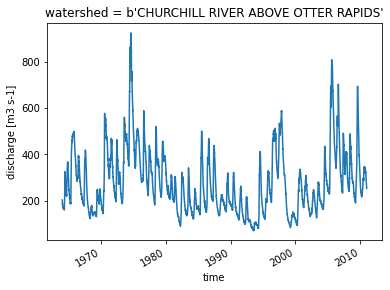

In [ ]:
ws.discharge.plot()

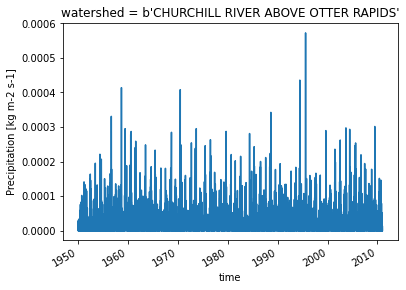

In [ ]:
ws.pr.plot()

 # Station Metadata
 

In [ ]:
watersheds = pd.Series(ds.watershed)
name = b"CHURCHILL RIVER ABOVE OTTER RAPIDS"
i = watersheds[watersheds == name].index.values[0]
watersheds[i]

b'CHURCHILL RIVER ABOVE OTTER RAPIDS'

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/streamflow-aisc/STATION_METADATA.csv')
metadata

,CANOPEX_ID,STATION_ID,STATION_NAME,PROVINCE,STATION LONGITUDE,STATION_LATITUDE,HYDROSHEDS_AREA,HYDAT_AREA,ACTIVE_STATION,RHBN_STATION,REAL_TIME_STATION,KÖPPEN-GEIGER ID,ENVCAN_NB_YEARS,ENVCAN_FIRST_YEAR,ENVCAN_LAST_YEAR,NRCAN_NB_YEARS,NRCAN_FIRST_YEAR,NRCAN_LAST_YEAR
0,1,'06CD002','CHURCHILL RIVER ABOVE OTTER RAPIDS','SK',-104.735832,55.647499,114248.000,119000.00,'True','True','True','Dfb',50,1963,2012,48,1963,2010
1,2,'05OH007','SEINE RIVER NEAR STE. ANNE','MB',-96.609032,49.643639,702.093,580.00,'True','True','True','Dfb',49,1964,2012,47,1964,2010
2,3,'10AD001','HYLAND RIVER NEAR LOWER POST','BC',-128.150833,59.950829,9148.050,9450.00,'True','False','False','Dfc',43,1951,1993,44,1950,1993
3,4,'10BC001','COAL RIVER AT THE MOUTH','BC',-126.950562,59.691391,8775.390,9190.00,'True','False','True','Dfc',35,1961,1995,35,1961,1995
4,5,'09AA013','TUTSHI RIVER AT OUTLET OF TUTSHI LAKE','BC',-134.332504,59.947781,895.434,989.00,'True','False','True','ET',57,1956,2012,55,1956,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,694,'02GB007','FAIRCHILD CREEK NEAR BRANTFORD','ON',-80.150000,43.150000,380.000,388.64,'False','False','False','Dfb',49,1964,2012,47,1964,2010
694,695,'02GD004','MIDDLE THAMES RIVER AT THAMESFORD','ON',-80.990000,43.060000,292.000,306.00,'False','False','False','Dfb',62,1951,2012,61,1950,2010
695,696,'02GD006','THAMES RIVER NEAR INGERSOLL','ON',-80.930000,43.020000,563.000,554.00,'False','False','False','Dfb',7,1951,1957,8,1950,1957
696,697,'02GC010','BIG OTTER CREEK AT TILLSONBURG','ON',-80.720000,42.860000,378.000,354.10,'True','False','False','Dfb',53,1960,2012,51,1960,2010


In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CANOPEX_ID         698 non-null    int64  
 1   STATION_ID         698 non-null    object 
 2   STATION_NAME       698 non-null    object 
 3   PROVINCE           698 non-null    object 
 4   STATION LONGITUDE  698 non-null    float64
 5   STATION_LATITUDE   698 non-null    float64
 6   HYDROSHEDS_AREA    698 non-null    float64
 7   HYDAT_AREA         698 non-null    float64
 8   ACTIVE_STATION     698 non-null    object 
 9   RHBN_STATION       698 non-null    object 
 10  REAL_TIME_STATION  698 non-null    object 
 11  KÖPPEN-GEIGER ID   698 non-null    object 
 12  ENVCAN_NB_YEARS    698 non-null    int64  
 13  ENVCAN_FIRST_YEAR  698 non-null    int64  
 14  ENVCAN_LAST_YEAR   698 non-null    int64  
 15  NRCAN_NB_YEARS     698 non-null    int64  
 16  NRCAN_FIRST_YEAR   698 non

# Watershed properties using PAVICS

In [ ]:
# Set environment variable WPS_URL to "http://localhost:9099" to run on the default local server
url = os.environ.get("WPS_URL")
if not url:
    url = "https://pavics.ouranos.ca/twitcher/ows/proxy/raven/wps"

wps = WPSClient(url)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
select_resp = wps.hydrobasins_select(
    location="-71.291660, 50.492758", aggregate_upstream=False
)

In [ ]:
feature_url, upstream_basins_url = select_resp.get(asobj=False)
feature, upstream_basins = select_resp.get(asobj=True)

,id,COAST,DIST_MAIN,DIST_SINK,ENDO,HYBAS_ID,LAKE,MAIN_BAS,NEXT_DOWN,NEXT_SINK,ORDER,PFAF_ID,SIDE,SORT,SUB_AREA,UP_AREA,geometry
0,0,0,490.9,490.9,0,7120270182,0,7120034330,7120270181,7120034330,1,724089370000,R,96929,29,9419.6,"MULTIPOLYGON (((-71.35920 50.41960, -71.36210 ..."


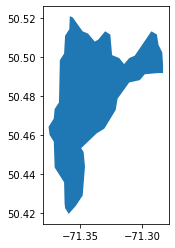

In [ ]:
import geopandas as gpd
df = gpd.read_file(feature_url)
display(df)
df.plot()